# 2021 美赛 F 题目

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

## Pre

### 国家名和Code索引

In [3]:
country_code_dict = pd.read_csv(r"country_code_dict\continents2.csv")
country_code_dict = dict(zip(country_code_dict["name"],country_code_dict["alpha-3"]))
# country_code_dict = pd.read_csv(r"country_code_dict\API_IP.JRN.ARTC.SC_DS2_en_csv_v2_3479946.csv",skiprows=4)
# country_code_dict = dict(zip(country_code_dict["Country Name"],country_code_dict["Country Code"]))
country_code_dict

{'Afghanistan': 'AFG',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia': 'BOL',
 'Bonaire, Sint Eustatius and Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory': 'IOT',
 'Brunei Darussalam': 'BRN',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burundi': 'BDI',
 'Cabo Verde': 'CPV',
 'Cambodia': 'KHM',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Cayman Islands': 'CYM',
 'Central African Republic': 'CAF',
 'Chad': 'TCD',
 'Chile': 'CHL',


## 高等教育支出占政府教育支出

In [4]:
df_0 = pd.read_csv(r"data\高等教育支出占政府教育支出\API_SE.XPD.TERT.ZS_DS2_en_csv_v2_3479907.csv",skiprows=4)
df_0 = df_0[["Country Code"] + [str(year) for year in range(2000,2021)]]
df_0.rename(columns={"Country Code": "Country"},inplace=True)
df_0

# df_0[df_0.Country == "USA"]

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABW,10.58496,12.16233,11.84006,NaN,10.97108,11.485290,NaN,NaN,NaN,...,NaN,20.72298,21.672690,20.021530,25.09833,18.39152,NaN,NaN,NaN,NaN
1,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,17.566855,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.98621,12.74171,11.756830,12.411280,15.95379,NaN,NaN,NaN,NaN,NaN
3,AFW,NaN,NaN,NaN,NaN,NaN,20.601435,NaN,19.437915,17.63690,...,16.15320,20.34201,21.377090,21.304925,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,NaN,NaN,NaN,NaN,NaN,8.283600,8.70122,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,ZAF,14.54785,14.51083,14.64847,14.11076,13.32329,15.054850,12.84803,13.095390,13.00968,...,11.70836,11.91283,12.408890,12.185090,12.54746,NaN,14.36148,15.25153,NaN,NaN
264,ZMB,19.41007,NaN,NaN,NaN,18.04966,25.752650,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.83535,12.33514,8.91604,NaN,NaN,NaN


## 高等教育人口（25-34岁占同龄人）比例

In [5]:
df_1 = pd.read_csv(r"data\population with tertiary education\DP_LIVE_19012022031229420.csv")
df_1 = df_1.pivot("LOCATION","TIME","Value").rename_axis(columns=None).reset_index()
df_1.rename(columns={"LOCATION":"Country"},inplace=True)
df_1.columns = ["Country","2017","2018","2019","2020"]
df_1

,Country,2017,2018,2019,2020
0,ARG,18.388876,39.957542,NaN,NaN
1,AUS,51.989063,51.393173,52.478458,54.614105
2,AUT,40.324657,40.458271,41.610401,41.419125
3,BEL,45.725086,47.397144,47.282982,48.508053
4,BRA,19.613668,21.314569,21.602325,23.531902
5,CAN,60.916767,61.754246,62.965115,64.386749
6,CHE,50.136665,51.206909,52.695705,52.972816
7,CHL,33.726387,NaN,NaN,NaN
8,COL,28.106581,28.959703,29.873518,29.993586
9,CRI,28.004108,27.815552,31.346508,32.465542


## 科技期刊平均数比人口数

### 人口数

In [6]:
df_pop = pd.read_csv(r"data\2020年人口\population_by_country_2020.csv")
df_pop = df_pop[["Country (or dependency)","Population (2020)"]]
df_pop.columns = ["Country","Avg"] # 仅仅是为了方便后续处理
df_pop.loc[:,"Country"] = df_pop["Country"].map(country_code_dict)
df_pop = df_pop[df_pop.Country.isna() == False]
df_pop

,Country,Avg
0,CHN,1440297825
1,IND,1382345085
2,USA,331341050
3,IDN,274021604
4,PAK,221612785
...,...,...
226,NRU,10836
230,MSR,4993
232,NIU,1628
233,TKL,1360


### 科技期刊文献数

In [7]:
df_2 = pd.read_csv(r"data\科技期刊文章数\API_IP.JRN.ARTC.SC_DS2_zh_csv_v2_3504181.csv",skiprows=4)
df_2 = df_2[["Country Code"]+[str(i) for i in range(2000,2021)]]
df_2.rename(columns={"Country Code":"Country"},inplace=True)
df_2

# df_2[df_2.Country == "USA"]

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFE,5408.820615,5683.467361,6063.522049,5977.061716,6621.659645,7093.498122,7916.757809,8451.620091,8859.217868,...,11746.90538,12849.50,13959.21,15149.54,15953.67,17617.02,19259.19,20033.38,NaN,NaN
2,AFG,4.000000,1.000000,4.500000,8.340000,5.750000,9.150000,13.690000,14.230000,12.500000,...,39.62000,34.15,27.81,34.69,22.20,81.64,91.89,111.72,NaN,NaN
3,AFW,1786.616941,1869.517953,2121.820000,2306.610000,2565.830000,2899.840000,3465.040000,3829.690000,3993.210000,...,5640.58000,5471.26,5693.76,6388.11,6603.20,7257.17,7907.50,9442.47,NaN,NaN
4,AGO,7.170000,10.580000,15.130000,5.890000,9.230000,10.040000,12.400000,10.160000,10.850000,...,17.78000,22.38,23.85,33.48,31.59,39.97,55.50,30.12,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.500000,...,106.73000,113.40,123.34,122.23,136.84,187.91,261.45,278.43,NaN,NaN
262,YEM,22.830000,42.490000,27.130000,33.840000,41.150000,48.320000,54.680000,45.480000,62.280000,...,105.17000,106.85,118.75,139.90,107.34,119.49,126.37,137.44,NaN,NaN
263,ZAF,3897.550000,4099.380000,4413.160000,4267.390000,4831.020000,5174.460000,5715.980000,5938.900000,6343.810000,...,8293.80000,9105.71,9709.05,10349.90,10964.38,12045.47,12846.08,13008.74,NaN,NaN
264,ZMB,33.600000,51.960000,61.540000,47.780000,42.840000,60.190000,67.370000,69.270000,92.070000,...,101.03000,106.12,119.47,134.46,157.23,181.66,209.45,213.07,NaN,NaN


### 后续处理

In [8]:
sharedKeys = [key for key in df_pop["Country"] if key in list(df_2["Country"])]
df_pop_tmp = df_pop[df_pop.Country.isin(sharedKeys)]
df_2_tmp = df_2[df_2.Country.isin(sharedKeys)]
df_pop_tmp.set_index("Country",inplace=True)
df_2_tmp.set_index("Country",inplace=True)
for i in range(21):
    df_pop_tmp.loc[:,str(2000 + i)] = df_pop_tmp["Avg"]
df_pop_tmp.drop(columns=["Avg"],inplace=True)
df_2_tmp = (df_2_tmp / df_pop_tmp ) * 10000
df_2 = df_2_tmp.dropna(axis=0,how="all")
df_2.reset_index(inplace=True)
df_2

C:\Users\Zarkli\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Zarkli\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AFG,0.001024,0.000256,0.001152,0.002134,0.001472,0.002342,0.003504,0.003642,0.003199,...,0.010140,0.008740,0.007117,0.008878,0.005681,0.020894,0.023517,0.028592,NaN,NaN
1,AGO,0.002171,0.003203,0.004580,0.001783,0.002794,0.003039,0.003754,0.003076,0.003285,...,0.005383,0.006775,0.007220,0.010136,0.009563,0.012100,0.016802,0.009118,NaN,NaN
2,ALB,0.077644,0.065028,0.085255,0.082788,0.062247,0.085082,0.094605,0.142081,0.180207,...,0.510281,0.576073,0.565299,0.626955,0.617954,0.646001,0.519734,0.626851,NaN,NaN
3,AND,0.000000,0.341584,0.064694,0.608123,0.169498,0.637882,0.649527,0.797029,0.217372,...,0.117743,0.463209,0.680580,0.540841,1.045454,1.033809,0.260070,0.465796,NaN,NaN
4,ARE,0.333411,0.384002,0.403132,0.544724,0.560010,0.710642,0.832105,0.764381,0.916305,...,1.434614,1.640579,1.781646,1.832832,2.315210,2.506495,2.925741,3.173165,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,WSM,0.335778,0.394678,0.379072,0.242646,0.244157,0.231068,0.648399,0.232075,0.132398,...,0.284430,0.126357,0.217979,0.609133,0.562315,0.371017,0.514491,0.556274,NaN,NaN
181,YEM,0.007626,0.014194,0.009063,0.011304,0.013746,0.016141,0.018266,0.015193,0.020805,...,0.035132,0.035693,0.039669,0.046734,0.035857,0.039916,0.042214,0.045912,NaN,NaN
182,ZAF,0.655748,0.689705,0.742497,0.717972,0.812801,0.870583,0.961692,0.999197,1.067322,...,1.395400,1.532001,1.633510,1.741331,1.844715,2.026604,2.161303,2.188670,NaN,NaN
183,ZMB,0.018193,0.028135,0.033322,0.025871,0.023197,0.032591,0.036479,0.037508,0.049853,...,0.054705,0.057461,0.064689,0.072806,0.085135,0.098363,0.113411,0.115371,NaN,NaN


## 学士，硕士，博士学位获得率

### 学士 bachelor

In [9]:
df_3_0 = pd.read_csv(r"data\educational attainment\bachelor.csv")
df_3_0.loc[[19,26],"country"] = ["Brunei Darussalam","Congo (Democratic Republic of the)"]
df_3_0.loc[:,"country"] = df_3_0["country"].map(country_code_dict)
df_3_0 = df_3_0.loc[df_3_0.country.isna() == False] # 有四个再iso alpha 里找不到类似国名的国家
df_3_0 = df_3_0[["country"]+[str(i) for i in range(2000,2020)]]
df_3_0.insert(21,"2020",np.nan)
df_3_0.rename(columns={"country":"Country"},inplace=True)
df_3_0

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.63,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.46,12.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,31.7,46.60,47.3,NaN,NaN
4,ARM,NaN,20.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.40,NaN,NaN,NaN,27.30,NaN,24.40,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,31.7,32.00,32.50,33.4,NaN,35.0,NaN,NaN
111,UZB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.4,15.70,15.80,16.3,NaN,16.3,NaN,NaN
112,VEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.50,NaN,NaN,NaN,21.50,25.1,NaN,NaN,NaN,NaN
113,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.07,NaN,8.25,NaN,NaN,NaN


#### 平均（不记录na值）

In [10]:
df_3_0.set_index("Country",inplace=True)
df_3_0 = pd.DataFrame(df_3_0.mean(axis=1)) # by default skipna == True
df_3_0.reset_index(inplace=True)
df_3_0.columns = ["Country","Avg"]
df_3_0 = df_3_0[df_3_0.Avg != 0]
df_3_0

,Country,Avg
0,ABW,12.900000
1,AGO,2.630000
2,ALB,7.180000
3,ARE,41.866667
4,ARM,24.125000
...,...,...
106,USA,32.920000
107,UZB,15.900000
108,VEN,21.700000
109,ZAF,7.160000


### 硕士 master

In [11]:
df_3_1 = pd.read_csv(r"data\educational attainment\master.csv")
df_3_1.loc[:,"country"] = df_3_1["country"].map(country_code_dict)
df_3_1 = df_3_1.loc[df_3_1.country.isna() == False] # 去掉在iso alpha 里找不到国名的国家
df_3_1.rename(columns={"country":"Country"},inplace=True)

insert_years = [i for i in range(2000,2021) if str(i) not in list(df_3_1.columns)]
df_3_1.rename(columns={i:int(i) for i in df_3_1.columns[1:]},inplace=True)
for year in insert_years:
    df_3_1.insert(1,year,np.nan)
df_3_1 = df_3_1[["Country"] + sorted(df_3_1.columns[1:])]
df_3_1.rename(columns={i:str(i) for i in df_3_1.columns[1:]},inplace=True)

df_3_1

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11.00,10.90,10.90,NaN,NaN,NaN,NaN
2,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.70,8.310,10.10,NaN,NaN
3,AUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.76,5.32,7.02,6.73,7.370,7.81,NaN,NaN
4,AUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.60,10.90,10.70,11.400,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,URY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.41,1.63,1.70,1.72,1.910,2.08,NaN,NaN
101,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11.60,11.80,12.00,12.60,NaN,13.10,NaN,NaN
102,VEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.03,1.00,NaN,NaN,NaN,NaN
103,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.18,NaN,1.460,NaN,NaN,NaN


#### 平均 (不记录na值)

In [12]:
df_3_1.set_index("Country",inplace=True)
df_3_1 = pd.DataFrame(df_3_1.mean(axis=1)) # by default skipna == True
df_3_1.reset_index(inplace=True)
df_3_1.columns = ["Country","Avg"]
df_3_1 = df_3_1[df_3_1.Avg != 0]
df_3_1

,Country,Avg
0,ALB,12.300000
1,AND,10.933333
2,ARE,11.370000
3,AUS,6.668333
4,AUT,10.900000
...,...,...
93,URY,1.741667
94,USA,12.220000
95,VEN,1.015000
96,ZAF,1.320000


### 博士 doctor

In [13]:
df_3_2 = pd.read_csv(r"data\educational attainment\doctor.csv")
df_3_2.loc[:,"country"] = df_3_2["country"].map(country_code_dict)
df_3_2 = df_3_2.loc[df_3_2.country.isna() == False] # 去掉在iso alpha 里找不到国名的国家
df_3_2.rename(columns={"country":"Country"},inplace=True)

insert_years = [i for i in range(2000,2021) if str(i) not in list(df_3_2.columns)]
df_3_2.rename(columns={i:int(i) for i in df_3_2.columns[1:]},inplace=True)
for year in insert_years:
    df_3_2.insert(1,year,np.nan)
df_3_2 = df_3_2[["Country"] + sorted(df_3_2.columns[1:])]
df_3_2.rename(columns={i:str(i) for i in df_3_2.columns[1:]},inplace=True)

df_3_2

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.540,0.6820,0.905,NaN,NaN
3,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3,NaN,NaN,NaN,0.351,NaN,0.3100,NaN,NaN,NaN
4,AUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.9860,0.934,1.320,1.080,1.2000,1.140,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,TUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.3440,0.351,0.339,0.359,0.4230,NaN,NaN,NaN
92,URY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.6800,1.770,1.700,1.850,NaN,2.030,NaN,NaN
94,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.3090,NaN,NaN,NaN


#### 平均(不记录NAN值)

In [14]:
df_3_2.set_index("Country",inplace=True)
df_3_2 = pd.DataFrame(df_3_2.mean(axis=1)) # by default skipna == True
df_3_2.reset_index(inplace=True)
df_3_2.columns = ["Country","Avg"]
df_3_2 = df_3_2[df_3_2.Avg != 0]
df_3_2

,Country,Avg
0,ABW,0.033900
1,ALB,0.089600
2,ARE,1.375667
3,ARM,0.320333
4,AUS,1.110000
...,...,...
84,TUR,0.363200
85,URY,0.061100
86,USA,1.806000
87,ZAF,0.309000


### 共有键处理

In [15]:
sharedKeys = [key for key in df_3_0["Country"] if key in list(df_3_1["Country"]) and key in list(df_3_2["Country"])]

df_3_0 = df_3_0[df_3_0.Country.isin(sharedKeys)]
df_3_0.reset_index(inplace=True,drop=True)

df_3_1 = df_3_1[df_3_1.Country.isin(sharedKeys)]
df_3_1.reset_index(inplace=True,drop=True)

df_3_2 = df_3_2[df_3_2.Country.isin(sharedKeys)]
df_3_2.reset_index(inplace=True,drop=True)
df_3_2

,Country,Avg
0,ALB,0.089600
1,ARE,1.375667
2,AUS,1.110000
3,AUT,0.831250
4,BEL,0.577400
...,...,...
72,TTO,0.236000
73,URY,0.061100
74,USA,1.806000
75,ZAF,0.309000


### 整合

In [16]:
df_3_0.set_index("Country",inplace=True)
df_3_1.set_index("Country",inplace=True)
df_3_2.set_index("Country",inplace=True)
df_3 = pd.concat([df_3_0,df_3_1,df_3_2],axis=1)
df_3.columns=["Bachelor","Master","Doctor"]
df_3.to_csv("res/educational_attainment.csv")
df_3

,Bachelor,Master,Doctor
Country,,,
ALB,7.180000,12.300000,0.089600
ARE,41.866667,11.370000,1.375667
AUS,29.083333,6.668333,1.110000
AUT,13.150000,10.900000,0.831250
BEL,32.020000,13.600000,0.577400
...,...,...,...
TTO,5.790000,1.660000,0.236000
URY,9.735000,1.741667,0.061100
USA,32.920000,12.220000,1.806000


### 经过Topsis 和 层次分析法后取得的数据

In [17]:
df_3 = pd.read_csv(r"res\educational_attainment_output - modified.csv")
df_3 = df_3[["Country","Score"]]

## QS 前980大学数 （按国家）

### 2018

In [18]:
df_4_2018_raw = pd.read_csv(r"data\qs2018-2020\2018-QS-World-University-Rankings - modified.csv",skiprows=1)
df_4_2018_raw = df_4_2018_raw["Country"]
df_4_2018_raw = df_4_2018_raw[df_4_2018_raw.isna() == False] # 去除缺失值

tmpDict = dict(Counter(df_4_2018_raw.to_list()))
df_4_2018 = pd.DataFrame({"Country": tmpDict.keys(),"num":tmpDict.values()})
df_4_2018_raw = df_4_2018.copy()
df_4_2018.loc[:,"Country"] = df_4_2018["Country"].map(country_code_dict)
# df_4_2018_raw[df_4_2018["Country"].isna() == True] # 查看国家-国家代码映射后的缺失值国家
df_4_2018 = df_4_2018[df_4_2018.Country.isna() == False]
df_4_2018

# df_4_2018[df_4_2018.Country == "USA"]

,Country,num
0,USA,159
1,GBR,78
2,CHE,9
3,SGP,3
4,AUS,37
...,...,...
81,PER,2
82,MAR,1
83,SRB,1
84,GHA,1


### 2019

In [19]:
df_4_2019_raw = pd.read_csv(r"data\qs2018-2020\2019-QS-World-University-Rankings - modified.csv",skiprows=1)
df_4_2019_raw = df_4_2019_raw["Country"]
df_4_2019_raw = df_4_2019_raw[df_4_2019_raw.isna() == False] # 去除缺失值

tmpDict = dict(Counter(df_4_2019_raw.to_list()))
df_4_2019 = pd.DataFrame({"Country": tmpDict.keys(),"num":tmpDict.values()})
df_4_2019_raw = df_4_2019.copy()
df_4_2019.loc[:,"Country"] = df_4_2019["Country"].map(country_code_dict)
# df_4_2019_raw[df_4_2019["Country"].isna() == True] # 查看国家-国家代码映射后的缺失值国家
df_4_2019 = df_4_2019[df_4_2019.Country.isna() == False]
df_4_2019

# df_4_2019[df_4_2019.Country == "BEL"]

,Country,num
0,USA,159
1,GBR,78
2,CHE,9
3,SGP,3
4,CHN,40
...,...,...
82,BHR,1
83,SRB,1
84,LKA,1
85,KEN,1


### 2020

In [20]:
df_4_2020_raw = pd.read_csv(r"data\qs2018-2020\2020-QS-World-University-Rankings - modified.csv",skiprows=1)
df_4_2020_raw = df_4_2020_raw["Country"]
df_4_2020_raw = df_4_2020_raw[df_4_2020_raw.isna() == False] # 去除缺失值

tmpDict = dict(Counter(df_4_2020_raw.to_list()))
df_4_2020 = pd.DataFrame({"Country": tmpDict.keys(),"num":tmpDict.values()})
df_4_2020_raw = df_4_2020.copy()
df_4_2020.loc[:,"Country"] = df_4_2020["Country"].map(country_code_dict)
# df_4_2020_raw[df_4_2020["Country"].isna() == True] # 查看国家-国家代码映射后的缺失值国家
df_4_2020 = df_4_2020[df_4_2020.Country.isna() == False]
df_4_2020

# df_4_2020[df_4_2020.Country == "BEL"]

,Country,num
0,USA,159
1,GBR,86
2,CHE,9
3,SGP,3
4,CHN,42
...,...,...
79,PRY,1
80,PAN,1
81,BHR,1
82,SRB,1


### 平均

In [21]:
sharedKeys = [key for key in df_4_2018["Country"] if key in list(df_4_2019["Country"]) and key in list(df_4_2020["Country"])] # 共有国家
df_4_2018 = df_4_2018[df_4_2018.Country.isin(sharedKeys)]
df_4_2019 = df_4_2019[df_4_2019.Country.isin(sharedKeys)]
df_4_2020 = df_4_2020[df_4_2020.Country.isin(sharedKeys)]
df_4_2018.set_index("Country",inplace=True)
df_4_2019.set_index("Country",inplace=True)
df_4_2020.set_index("Country",inplace=True)
df_4 = (df_4_2018 + df_4_2019 + df_4_2020) / 3
df_4.reset_index(inplace=True)
df_4.rename(columns={"num":"Avg"},inplace=True)
df_4

,Country,Avg
0,ARE,7.333333
1,ARG,14.666667
2,AUS,36.333333
3,AUT,8.000000
4,AZE,1.333333
...,...,...
72,UKR,6.000000
73,URY,2.000000
74,USA,159.000000
75,VEN,4.666667


## 整合

### 预测

In [22]:
from numpy.polynomial import Polynomial

In [23]:
res = pd.DataFrame(columns=["Indicator"] + [str(year) for year in range(2021,2036)])
res

,Indicator,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035


In [24]:
polynomial_dim = 1 # 预测时拟合曲线次数

# 一起改
country = "BEL"

tmp = df_0
indicator = "EXP"

if country == "BEL":
    if indicator == "EXP":
        increasement = list(map(lambda x: 0.30 if x < 5 else 0.28 if x < 10 else 0.25,[i for i in range(15)])) # 对于 EXP
    elif indicator == "PHE":
        increasement = list(map(lambda x: 0.25 if x < 5 else 0.2 if x < 10 else 0.16,[i for i in range(15)])) # 对于 PHE
    else:
        increasement = [0.1 for i in range(15)] # 对于 NA
else:
    increasement = [0] * 15

In [25]:
tmp = tmp[tmp["Country"] == country]
tmp = tmp.dropna(axis=1)
tmp.set_index("Country",inplace=True)
tmp = tmp.stack().reset_index()
tmp.columns = ["Country","Year","Value"]
tmp.drop(columns=["Country"],inplace=True)
tmp["Year"] = pd.to_numeric(tmp["Year"])
# tmp.to_csv("test/tmp.csv")

# print(increasement)
originLen = len(tmp)
for i in range(15):
    x = tmp["Year"]
    y = tmp["Value"]
    cruve = Polynomial.fit(x,y,polynomial_dim)
    newVal = cruve(2021 + i) * (1 + increasement[i])
    tmp.loc[originLen + i] = [2021+i,newVal]
datas = tmp # 后续画图

tmp.insert(0,"Indicator",indicator)
tmp = tmp.pivot("Indicator","Year","Value").rename_axis(columns=None)
tmp.reset_index(inplace=True)
tmp = tmp[["Indicator"] + [float(year) for year in range(2021,2036)]]
tmp.columns = ["Indicator"] + [str(year) for year in range(2021,2036)]
# res.loc[indicator_index] = tmp # 不知道为什么报错 哭了
# res
# tmp.columns == res.columns
res = pd.concat([res,tmp])
res

,Indicator,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
0,EXP,29.373882,34.337196,39.04063,43.754549,48.601661,52.824307,57.793578,63.000293,68.464754,74.202982,78.347884,84.138231,90.182483,96.487258,103.058462


### 保存数据

In [26]:
res.to_csv("predict.csv")

#### 绘制预测完后数据

30.163073685623186 + 33.7406819024473 x**1 + 31.078747470790248 x**2 +
3.3640920257646507 x**3


<Figure size 864x720 with 0 Axes>

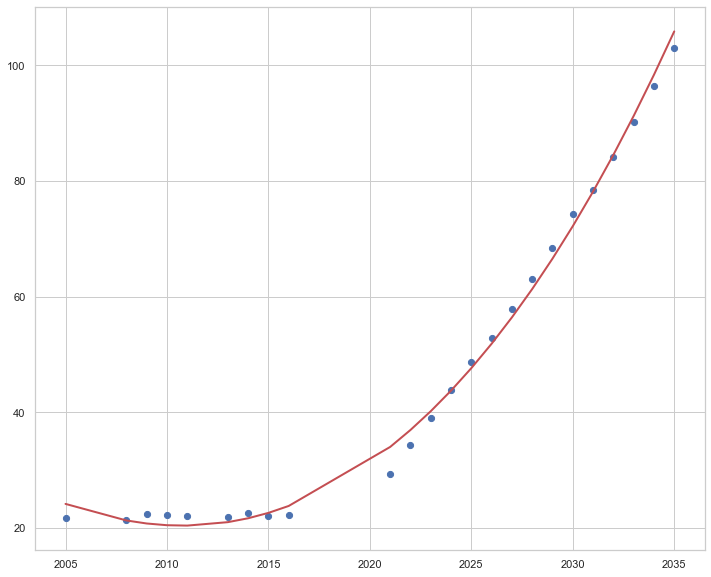

In [27]:
plt.figure(figsize=(12,10))
sns.set_theme(style="whitegrid")
# datas = datas[datas["Year"].isin([float(i) for i in range(2021,2036)])]

# x = datas["Year"]
# y = datas["Value"]
# plt.plot(x,y,c="b",lw=2,label="origin",marker="x",markersize=12,markercolor="g")
# sns.lineplot(x,y)


# sns.scatterplot(data=datas,x="Year",y="Value")
plt.figure(figsize=(12,10))
plt.scatter("Year","Value",data=datas,s=38)
# plt.xlabel("Year",fontsize=12)
# plt.ylabel(indicator,fontsize=12)

cruve = Polynomial.fit(x,y,3) # 最后使用三次曲线拟合，得到函数表达式
print(cruve)
plt.savefig(indicator + ".png",dpi=300)

x = datas["Year"]
yvals = cruve(x)
plt.plot(x,yvals,c="r",label="predict",lw=2)

# plt.legend(loc=2,fontsize=12)


# %matplotlib
# sns.set_style("whitegrid")
# sns.set()
# g = sns.FacetGrid(data=datas)
# g.set(xlim=(datas["Year"][0] - 2,2037))
# g.map(sns.regplot,"Year","Value",truncate=False)
# # gridobj.set_xlabels([str(year) for year in range(datas["Year"]-2,2035+2)])
# plt.show(block=True)

### 自动化获取指定国家2021-2035年预测数据 并 画图

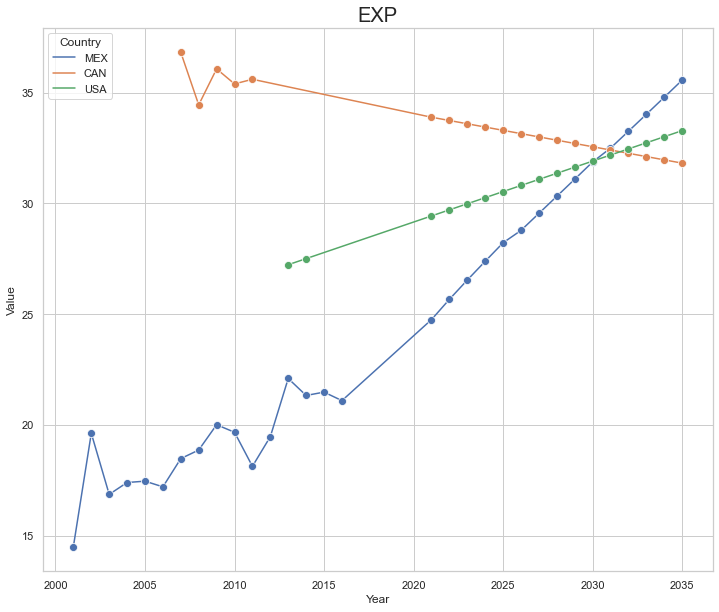

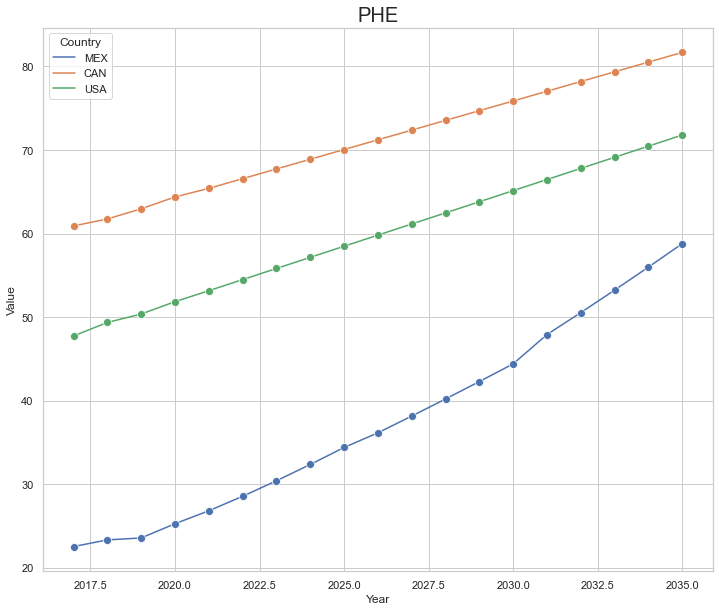

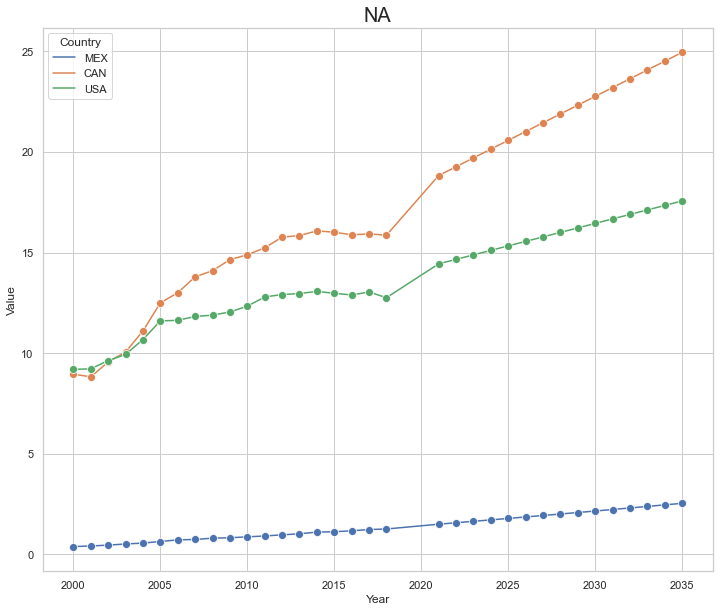

In [48]:
polynomial_dim = 1 # 预测时拟合曲线次数
datas = []

countrys = ["MEX","CAN","USA"]
indicators = ["EXP","PHE","NA"]
indicator_datas = [df_0,df_1,df_2]

for country in countrys:
    res = pd.DataFrame(columns=["Indicator"] + [str(year) for year in range(2021,2036)])
    for i in range(len(indicators)):
        tmp = indicator_datas[i]
        indicator = indicators[i]
        indicator_index = 0

        if country == "MEX":
            if indicator == "EXP":
                increasement = list(map(lambda x: 0.06 if x < 5 else 0.05 if x < 10 else 0.045,[i for i in range(15)])) # 对于 EXP
            elif indicator == "PHE":
                increasement = list(map(lambda x: 0.04 if x < 5 else 0.03 if x < 10 else 0.06,[i for i in range(15)])) # 对于 PHE
            else:
                increasement = [0.05] * 15 # 对于 NA
        else:
            increasement = [0] * 15
        tmp = tmp[tmp["Country"] == country]

        tmp = tmp.dropna(axis=1)
        tmp.set_index("Country",inplace=True)
        tmp = tmp.stack().reset_index()
        tmp.columns = ["Country","Year","Value"]
        tmp.drop(columns=["Country"],inplace=True)
        tmp["Year"] = pd.to_numeric(tmp["Year"])
        # tmp.to_csv("test/tmp.csv")

        # print(increasement)
        originLen = len(tmp)
        for i in range(15):
            x = tmp["Year"]
            y = tmp["Value"]
            cruve = Polynomial.fit(x,y,polynomial_dim)
            newVal = cruve(2021 + i) * (1 + increasement[i])
            tmp.loc[originLen + i] = [2021+i,newVal]
        datas.append(tmp) # 也保留之前年份数据，给后续画图用

        tmp.insert(0,"Indicator",indicator)
        tmp = tmp.pivot("Indicator","Year","Value").rename_axis(columns=None)
        tmp.reset_index(inplace=True)
        tmp = tmp[["Indicator"] + [float(year) for year in range(2021,2036)]]
        tmp.columns = ["Indicator"] + [str(year) for year in range(2021,2036)]
        # res.loc[indicator_index] = tmp # 不知道为什么报错 哭了
        # res
        # tmp.columns == res.columns
        res = pd.concat([res,tmp])
    res.to_csv(f"predict/{country}.csv")

cruve_file = open("predict/cruve.txt","a")
for indicator_index in range(len(indicators)):
    indicator_data = datas[indicator_index:len(datas):len(indicators)]
    plt.figure(figsize=(12,10))
    sns.set_theme(style="whitegrid")

    cruve_file.write(f"{indicators[indicator_index]}:\n")
    cruves = [Polynomial.fit(country_data["Year"],country_data["Value"],3) for country_data in indicator_data]
    for cruve in cruves:
        cruve_file.write(f"{cruve}\n")
    
    for i in range(len(indicator_data)):
        x = indicator_data[i]
        x.insert(0,"Country",countrys[i])
    final = pd.concat(indicator_data)
    final.reset_index(inplace=True,drop=True)
    # print(final)

    g = sns.lineplot(data=final,x="Year",y="Value",hue="Country",marker="o",markersize=8)
    g.set_title(final["Indicator"][0],fontsize=20)
    
    cruve_file.write("\n")
    plt.savefig(f"predict/{indicators[indicator_index]}.png",dpi=300)
cruve_file.close() 
    